# Setup

In [1]:
library(drc)
library(nlme)
library(aomisc)

Loading required package: MASS


'drc' has been loaded.


Please cite R and 'drc' if used for a publication,

for references type 'citation()' and 'citation('drc')'.



Attaching package: ‘drc’


The following objects are masked from ‘package:stats’:

    gaussian, getInitial


Loading required package: plyr

Loading required package: car

Loading required package: carData

Loading required package: multcompView

Registered S3 method overwritten by 'aomisc':
  method   from
  plot.nls nlme



# Fitting


Model fitted: Negative exponential function (2 parms)

Parameter estimates:

                Estimate Std. Error t-value   p-value    
a:(Intercept) 2.5565e-01 8.7059e-08 2936549 2.168e-07 ***
c:(Intercept) 7.6235e-01 9.4938e-07  802991 7.928e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error:

 6.575426e-08 (1 degrees of freedom)

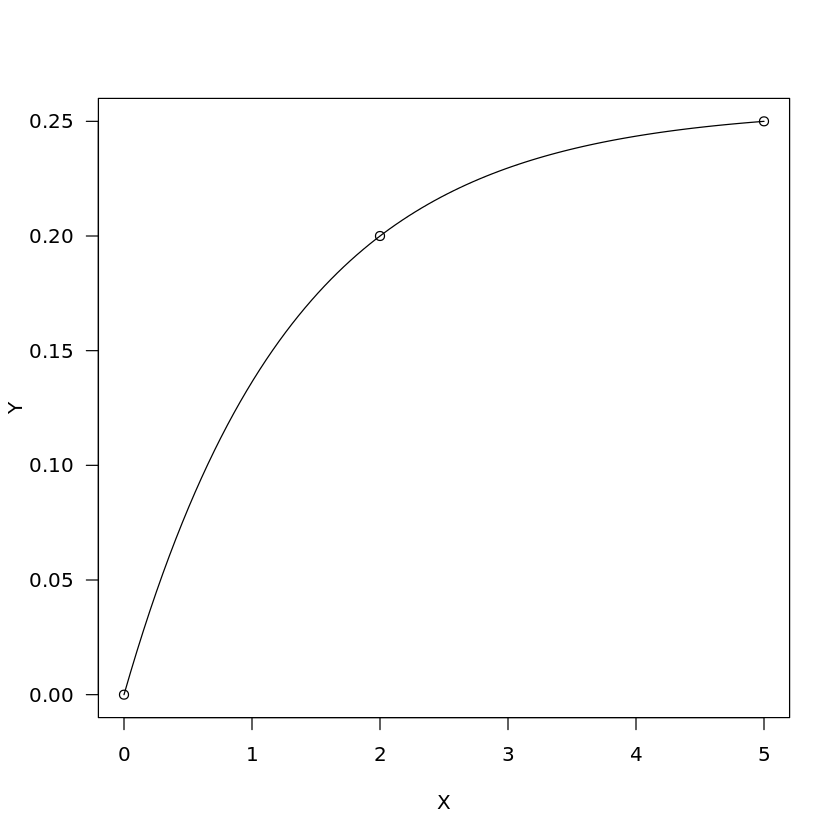

In [2]:
# Input values
X <- c(0,2,5) # Timepoint
Y <- c(0,0.2,0.25) # Relative or absolute enrichment

model <- drm(Y ~ X, fct = DRC.negExp()) # Fits the negative exponential function

plot(model, log='')
summary(model)

# Simulation

,Simulated,groundTruth,Ratio
,<dbl>,<dbl>,<dbl>
Enrichment,0.4972282136,0.50,0.99445643
Relative flux,0.0005445932,0.01,0.05445932


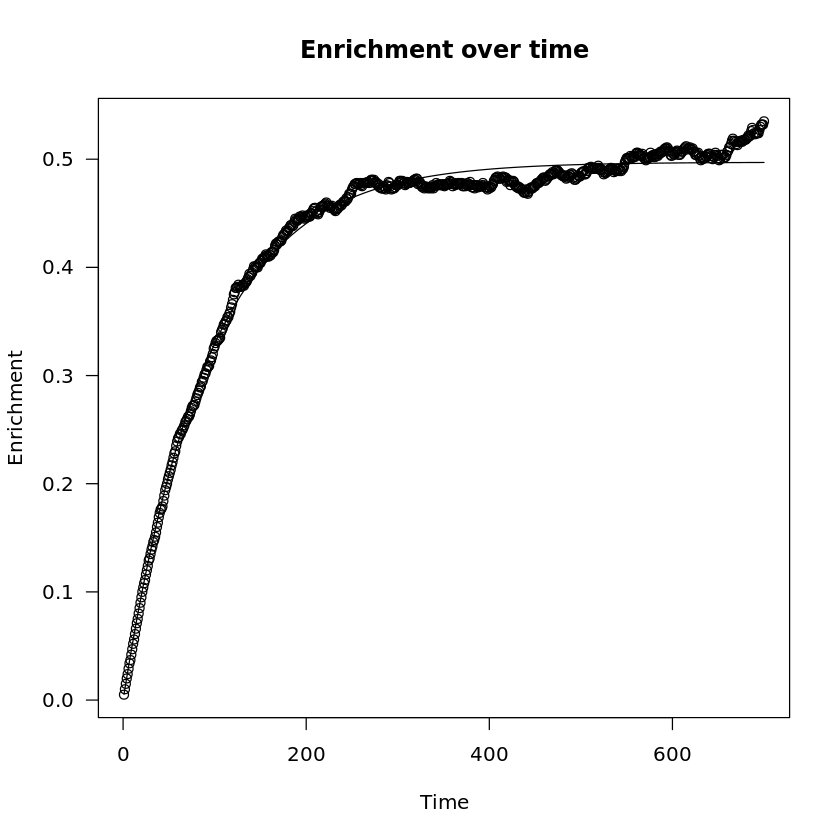

In [18]:
numberOfTotalBalls <- 1000 # Pool size
numberOfReplacedBalls_white <- 5 # Absolute unlabeled flux
numberOfReplacedBalls_red <- 5 # Absolute labeled flux
numberOfCycles <- 700 # Labeling time


# Calculations required to run the simulation
numberOfReplacedBalls <- numberOfReplacedBalls_white + numberOfReplacedBalls_red # Absolute flux
trueRelativeFlux <- (numberOfReplacedBalls_white + numberOfReplacedBalls_red) / numberOfTotalBalls # Theoretical relative flux
trueEnrichment <- numberOfReplacedBalls_red / (numberOfReplacedBalls_red + numberOfReplacedBalls_white) # Theoretical enrichment


# Initializatoin
urn <- rep('white', numberOfTotalBalls)
enrichmentPerStep <- NULL


# Simulation of picking random balls from an urn and replacing them
for (i in 1:numberOfCycles) {    
    
    # Select random balls to be removed from the urn
    selection <- sample(1:numberOfTotalBalls, numberOfReplacedBalls, replace=FALSE) # replace=FALSE: same number cannot be picked twice
    
    # Replace selected balls with white and red balls
    urn <- replace(urn, selection, c(rep('white', numberOfReplacedBalls_white), rep('red', numberOfReplacedBalls_red)))
    
    # Count white and red balls
    n_white <- length(urn[urn=='white'])
    n_red <- length(urn[urn=='red'])
    # Calculate ratio of red balls to total balls
    enrichment = n_red/(n_white + n_red)
    
    # Save enrichment
    enrichmentPerStep[i] <- enrichment
    
}


# Input values for plot
X <- c(1:length(enrichmentPerStep)) # Timepoint
Y <- c(enrichmentPerStep) # Relative enrichment

# Fit of negative exponential function
model <- drm(Y ~ X, fct = DRC.negExp())


# Compare fitted results to ground truth in table

# Get data from fitted curve
modelRes <- summary(model)
# Put data into data frame
res <- data.frame(Simulated = c(modelRes$coefficients[1,1], modelRes$coefficients[1,2]),
                  groundTruth = c(trueEnrichment, trueRelativeFlux)
                 )
# Calculate deviation from ground truth
res$Ratio <- res$Simulated / res$groundTruth # This line is misformated by github and will not work when copy-pasted from the browser
# Label rows
rownames(res) <- c('Enrichment', 'Relative flux')
# Print data frame
res

# Plot data points with fit
plot(model, log='', main='Enrichment over time', xlab='Time', ylab='Enrichment')